# Coronavirus Tweets- Text Sentiment Analyis & Topic Modeling

- member 1: Vanessa Aispuro
- member 2: Elysa Alamillo
- member 3: Jaime Gomez

# Introduction

The coronavirus is for many a thing of the past. As we all move forward with our lives we remember the multiple lockdowns, the fear in many for our loved ones and ourselves. But more interesting social phenonomens were at play as well like a toliet paper and hand sanitizer outbreak, being isolated in our homes, banter over mask wearing and so much more. This python project analyzes the public's reactions on Twitterabout a week before the shutdown in the United States to about a week after the shut down took place through public tweets. 

Sentiment analysis provides a clear image of the sentimental polarity through comments and compares the variations across various issues, making it a useful tool for reputation management, targeted marketing efforts, and competitive analysis. As a result, we decided to apply such to our data on public Twitter users' tweets surrounding the Coronavirus. Second, we used topic modeling to understand the themes surrounding Covid 19. Topic modeling is a technique used to automatically spot trends and classify related documents according to their content. This allows us to develop a better understanding of the mindset of the population in the United States during a time of crisis.  

#### The tweets have been pulled from Twitter and manual tagging has been done then. We've been given codes for names and usernames to avoid any privacy concerns.

In [3]:
![Image Description](subdirectory/IMG_2120.JPG)

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `[Image Description](subdirectory/IMG_2120.JPG)'


# Research Questions  

### What are the specific aspects or topics that elicit positive or negative sentiment? 

In [41]:
!pip install nltk 
!pip install -U textblob

In [24]:
!pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


#Introduction


In [25]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import re

In [26]:
def get_sentiment_textblob(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"


In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    
    if sentiment['compound'] > 0.05:
        return "Positive"
    elif sentiment['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"

In [9]:
import pandas as pd
df = pd.read_csv('Corona_NLP_test.csv')

In [11]:
print(df)

      UserName  ScreenName             Location     TweetAt  \
0            1       44953                  NYC  02-03-2020   
1            2       44954          Seattle, WA  02-03-2020   
2            3       44955                  NaN  02-03-2020   
3            4       44956          Chicagoland  02-03-2020   
4            5       44957  Melbourne, Victoria  03-03-2020   
...        ...         ...                  ...         ...   
3793      3794       48746            Israel ??  16-03-2020   
3794      3795       48747       Farmington, NM  16-03-2020   
3795      3796       48748        Haverford, PA  16-03-2020   
3796      3797       48749                  NaN  16-03-2020   
3797      3798       48750  Arlington, Virginia  16-03-2020   

                                          OriginalTweet           Sentiment  
0     TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1     When I couldn't find hand sanitizer at Fred Me...            Positive  
2     Fin

In [13]:
df.describe()

,UserName,ScreenName
count,3798.000000,3798.000000
mean,1899.500000,46851.500000
std,1096.532489,1096.532489
min,1.000000,44953.000000
25%,950.250000,45902.250000
50%,1899.500000,46851.500000
75%,2848.750000,47800.750000
max,3798.000000,48750.000000


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('Corona_NLP_test.csv')

In [5]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [10]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 33.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 11.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('Corona_NLP_test.csv')

In [9]:
import re

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  
    text = re.sub(r'@\w+', '', text) 
    text = re.sub(r'#', '', text)
    return text.strip()

df['clean_text'] = df['OriginalTweet'].apply(clean_text)

In [26]:
df["OriginalTweet"][0]

'TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1'

In [12]:
df["clean_text"][0]

'TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as coronavirus-fearing shoppers stock up'

In [22]:
def get_sentiment_textblob(text):
    """
    this function takes text as the input and calculates the sentiment score of this given text.
    """
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

def get_sent_textblob_cont(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] > 0.05:
        return "Positive"
    elif sentiment['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"
    
def get_sent_vader_cont(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)['compound']


In [28]:
df['sentiment_textblob'] = df['clean_text'].apply(get_sentiment_textblob)
df[["clean_text", "sentiment_textblob"]]

,clean_text,sentiment_textblob
0,TRENDING: New Yorkers encounter empty supermar...,Positive
1,When I couldn't find hand sanitizer at Fred Me...,Neutral
2,Find out how you can protect yourself and love...,Positive
3,Panic buying hits NewYork City as anxious shop...,Positive
4,toiletpaper dunnypaper coronavirus coronavirus...,Negative
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Positive
3795,Asst Prof of Economics was on talking about ...,Neutral
3796,Gov need to do somethings instead of biar je r...,Negative


In [29]:
df['sent_textblob_cont'] = df['clean_text'].apply(get_sent_textblob_cont)
df[["clean_text", "sentiment_textblob", "sent_textblob_cont"]]

,clean_text,sentiment_textblob,sent_textblob_cont
0,TRENDING: New Yorkers encounter empty supermar...,Positive,0.018182
1,When I couldn't find hand sanitizer at Fred Me...,Neutral,0.000000
2,Find out how you can protect yourself and love...,Positive,0.700000
3,Panic buying hits NewYork City as anxious shop...,Positive,0.075000
4,toiletpaper dunnypaper coronavirus coronavirus...,Negative,-0.016667
...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive,0.227273
3794,Did you panic buy a lot of non-perishable item...,Positive,0.500000
3795,Asst Prof of Economics was on talking about ...,Neutral,0.000000
3796,Gov need to do somethings instead of biar je r...,Negative,-1.000000


In [30]:
df['sentiment_vader'] = df['clean_text'].apply(get_sentiment_vader)
df[["clean_text", "sentiment_textblob", "sentiment_vader"]]

,clean_text,sentiment_textblob,sentiment_vader
0,TRENDING: New Yorkers encounter empty supermar...,Positive,Negative
1,When I couldn't find hand sanitizer at Fred Me...,Neutral,Negative
2,Find out how you can protect yourself and love...,Positive,Positive
3,Panic buying hits NewYork City as anxious shop...,Positive,Negative
4,toiletpaper dunnypaper coronavirus coronavirus...,Negative,Neutral
...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive,Positive
3794,Did you panic buy a lot of non-perishable item...,Positive,Negative
3795,Asst Prof of Economics was on talking about ...,Neutral,Neutral
3796,Gov need to do somethings instead of biar je r...,Negative,Negative


In [31]:
df['sent_vader_cont'] = df['clean_text'].apply(get_sent_vader_cont)
df[["clean_text", "sentiment_textblob", "sent_textblob_cont", "sentiment_vader", "sent_vader_cont"]]

,clean_text,sentiment_textblob,sent_textblob_cont,sentiment_vader,sent_vader_cont
0,TRENDING: New Yorkers encounter empty supermar...,Positive,0.018182,Negative,-0.2023
1,When I couldn't find hand sanitizer at Fred Me...,Neutral,0.000000,Negative,-0.3417
2,Find out how you can protect yourself and love...,Positive,0.700000,Positive,0.7579
3,Panic buying hits NewYork City as anxious shop...,Positive,0.075000,Negative,-0.6486
4,toiletpaper dunnypaper coronavirus coronavirus...,Negative,-0.016667,Neutral,0.0000
...,...,...,...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive,0.227273,Positive,0.5574
3794,Did you panic buy a lot of non-perishable item...,Positive,0.500000,Negative,-0.2500
3795,Asst Prof of Economics was on talking about ...,Neutral,0.000000,Neutral,0.0000
3796,Gov need to do somethings instead of biar je r...,Negative,-1.000000,Negative,-0.8205


In [34]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_text,sentiment_vader,sentiment_textblob,sent_textblob_cont,sent_vader_cont
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,TRENDING: New Yorkers encounter empty supermar...,Negative,Positive,0.018182,-0.2023
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,When I couldn't find hand sanitizer at Fred Me...,Negative,Neutral,0.000000,-0.3417
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,Find out how you can protect yourself and love...,Positive,Positive,0.700000,0.7579
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,Panic buying hits NewYork City as anxious shop...,Negative,Positive,0.075000,-0.6486
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpaper dunnypaper coronavirus coronavirus...,Neutral,Negative,-0.016667,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,Meanwhile In A Supermarket in Israel -- People...,Positive,Positive,0.227273,0.5574
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,Did you panic buy a lot of non-perishable item...,Negative,Positive,0.500000,-0.2500
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,Asst Prof of Economics was on talking about ...,Neutral,Neutral,0.000000,0.0000
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,Gov need to do somethings instead of biar je r...,Negative,Negative,-1.000000,-0.8205


In [38]:
print(df.columns)

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'clean_text', 'sentiment_vader', 'sentiment_textblob',
       'sent_textblob_cont', 'sent_vader_cont'],
      dtype='object')


In [61]:
import matplotlib.pyplot as plt

keyword_scores = {'empty1': -0.2 , 'couldnt2': -0.3, 'protect2': 0.7, 'panic4': -0.6, 'toiletpaper5': 0.00}

In [62]:
positive_color = 'green'
negative_color = 'red'

In [63]:
positive_keywords = []
negative_keywords = []

for keyword, score in keyword_scores.items():
    if score > 0:
        positive_keywords.append((keyword, score))
    else:
        negative_keywords.append((keyword, score))

In [64]:
positive_keywords = sorted(positive_keywords, key=lambda x: x[1], reverse=True)
negative_keywords = sorted(negative_keywords, key=lambda x: x[1])

In [65]:
positive_labels = [kw[0] for kw in positive_keywords]
positive_scores = [kw[1] for kw in positive_keywords]
negative_labels = [kw[0] for kw in negative_keywords]
negative_scores = [kw[1] for kw in negative_keywords]

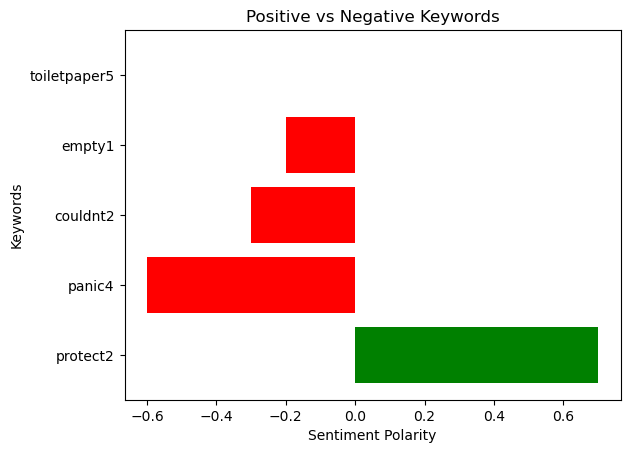

In [66]:
fig, ax = plt.subplots()

ax.barh(positive_labels, positive_scores, color=positive_color)
ax.barh(negative_labels, negative_scores, color=negative_color)

ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Keywords')
ax.set_title('Positive vs Negative Keywords')

plt.show()